In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df=pd.read_excel(f'C:/Users/HP/Desktop/TESIS/EMPRESA_NDA/DATOS/DATOS_NDA.xlsx', parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809261 entries, 0 to 809260
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PedidoId            809261 non-null  int64         
 1   Cantidad            809261 non-null  int64         
 2   MontoProd           809261 non-null  float64       
 3   MontoFinalProd      809261 non-null  float64       
 4   Producto            809261 non-null  object        
 5   Fecha               809261 non-null  datetime64[ns]
 6   Id_Cliente          809261 non-null  object        
 7   Departamento        809261 non-null  object        
 8   CodigoProducto      809261 non-null  object        
 9   Grandes_Categorias  809261 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 61.7+ MB


In [4]:
df.head()

,PedidoId,Cantidad,MontoProd,MontoFinalProd,Producto,Fecha,Id_Cliente,Departamento,CodigoProducto,Grandes_Categorias
0,38,1,14.5,15.0,jaboncillo lifebuoy antibacterial crema 3undx ...,2020-03-28,59170350140,Chuquisaca,572054,Home_Care
1,38,1,26.0,26.0,lavavajilla ola limon 2l,2020-03-28,59170350140,Chuquisaca,6010102,Home_Care
2,38,1,28.0,28.0,"suavizante ola bebe 1,7l",2020-03-28,59170350140,Chuquisaca,6030172,Personal_Care
3,38,1,18.0,18.0,arroz de la huerta knorr 197g,2020-03-28,59170350140,Chuquisaca,67332811,Personal_Care
4,38,1,8.0,8.0,caldos knorr de verdura estuche 12 cubos,2020-03-28,59170350140,Chuquisaca,67272819,Home_Care


In [5]:
df['Dia']=df['Fecha'].dt.weekday
dia = {0:'Lunes', 1:'Martes', 2:'Miercoles', 3:'Jueves', 4:'Viernes', 5:'Sábado', 6:'Domingo'}

def nombredia(a):
    if a in dia:
        return(dia[a])
    
df['Dia']= df['Dia'].apply(nombredia)

In [6]:
df.head()

,PedidoId,Cantidad,MontoProd,MontoFinalProd,Producto,Fecha,Id_Cliente,Departamento,CodigoProducto,Grandes_Categorias,Dia
0,38,1,14.5,15.0,jaboncillo lifebuoy antibacterial crema 3undx ...,2020-03-28,59170350140,Chuquisaca,572054,Home_Care,Sábado
1,38,1,26.0,26.0,lavavajilla ola limon 2l,2020-03-28,59170350140,Chuquisaca,6010102,Home_Care,Sábado
2,38,1,28.0,28.0,"suavizante ola bebe 1,7l",2020-03-28,59170350140,Chuquisaca,6030172,Personal_Care,Sábado
3,38,1,18.0,18.0,arroz de la huerta knorr 197g,2020-03-28,59170350140,Chuquisaca,67332811,Personal_Care,Sábado
4,38,1,8.0,8.0,caldos knorr de verdura estuche 12 cubos,2020-03-28,59170350140,Chuquisaca,67272819,Home_Care,Sábado


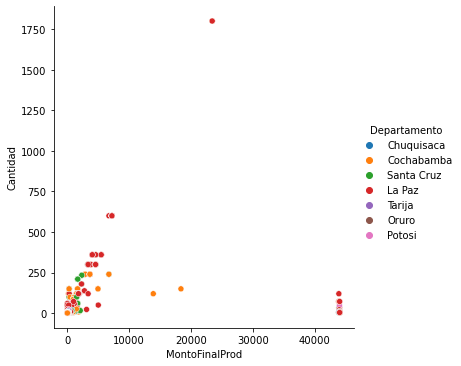

In [7]:
sns.relplot(x='MontoFinalProd', y= 'Cantidad', data=df, hue='Departamento')

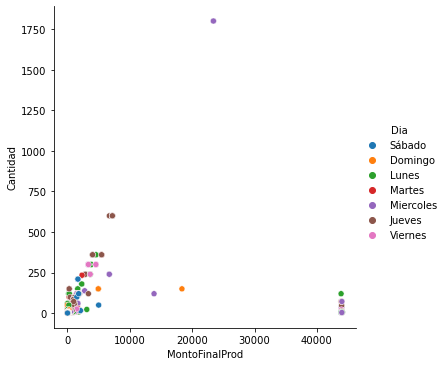

In [8]:
sns.relplot(x='MontoFinalProd', y= 'Cantidad', data=df, hue='Dia')

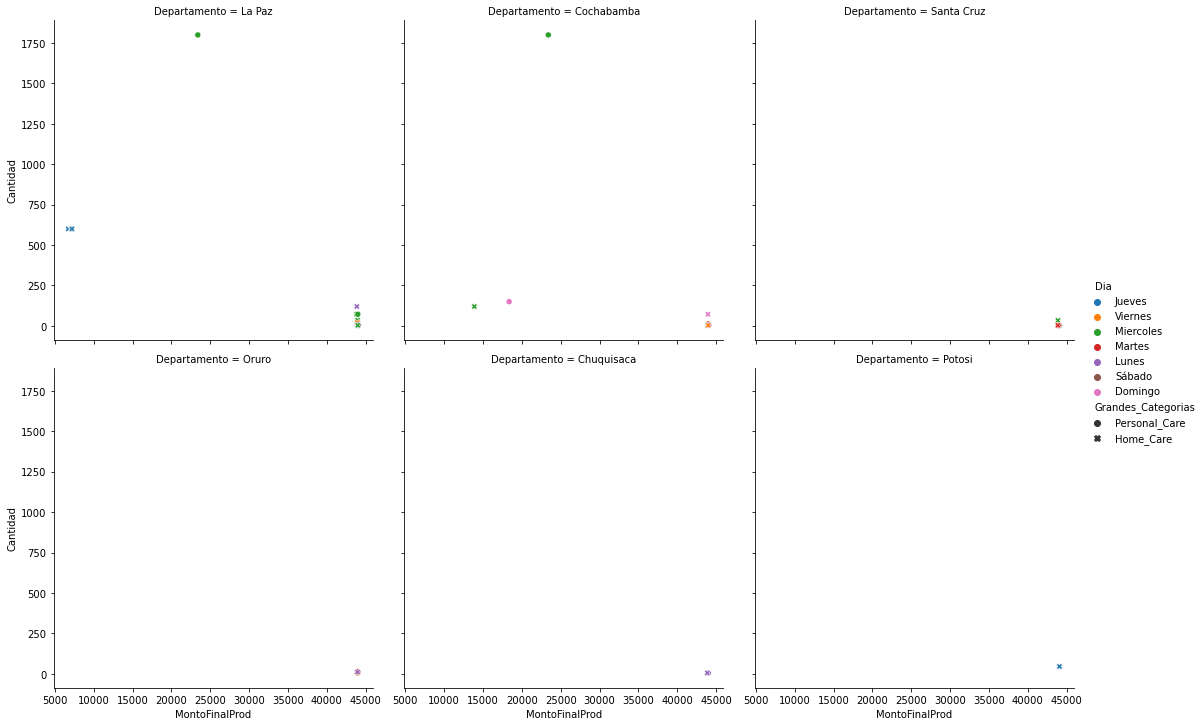

In [9]:
filt= (df['Cantidad']>500) | (df['MontoFinalProd']>10000)
df1=df[filt]
sns.relplot(x='MontoFinalProd', y= 'Cantidad', data=df1, hue='Dia', style='Grandes_Categorias', col='Departamento', col_wrap=3)

In [10]:
df1.shape

(59, 11)

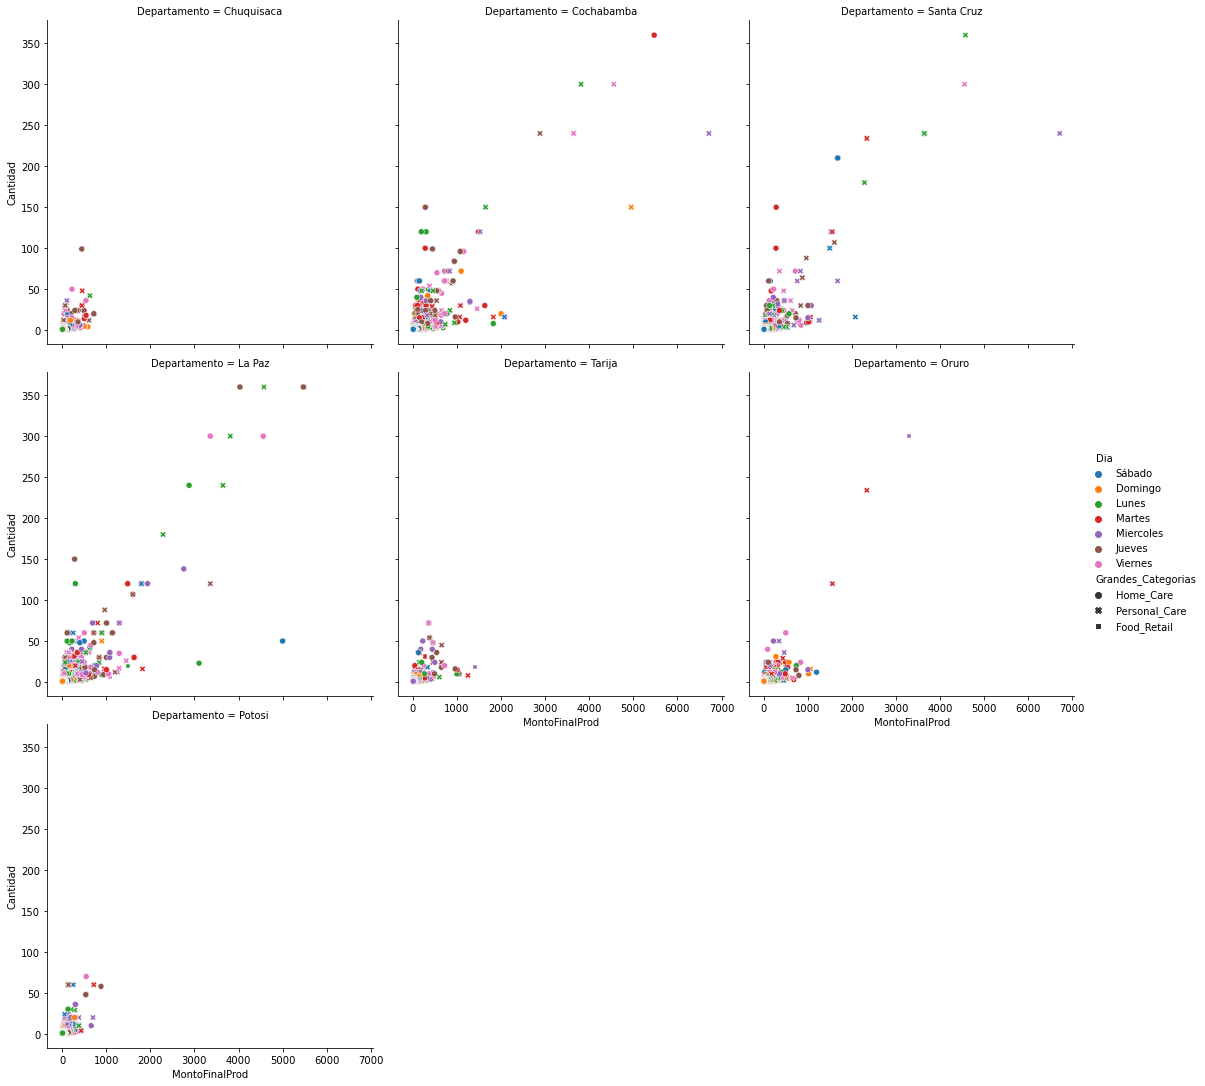

In [11]:
filt2= (df['Cantidad']<500) & (df['MontoFinalProd']<10000) & (df['Cantidad']>0) & (df['MontoFinalProd']>0)
df2=df[filt2]
sns.relplot(x='MontoFinalProd', y= 'Cantidad', data=df2, hue='Dia', style='Grandes_Categorias', col='Departamento', col_wrap=3)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806430 entries, 0 to 809260
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PedidoId            806430 non-null  int64         
 1   Cantidad            806430 non-null  int64         
 2   MontoProd           806430 non-null  float64       
 3   MontoFinalProd      806430 non-null  float64       
 4   Producto            806430 non-null  object        
 5   Fecha               806430 non-null  datetime64[ns]
 6   Id_Cliente          806430 non-null  object        
 7   Departamento        806430 non-null  object        
 8   CodigoProducto      806430 non-null  object        
 9   Grandes_Categorias  806430 non-null  object        
 10  Dia                 806430 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 73.8+ MB


In [14]:
#def division(x,y):
#   return(x/y)
#df2['Precio']= df2.apply(division(df2['MontoFinalProd'],df2['Cantidad']))

In [ ]:
#df2.info()

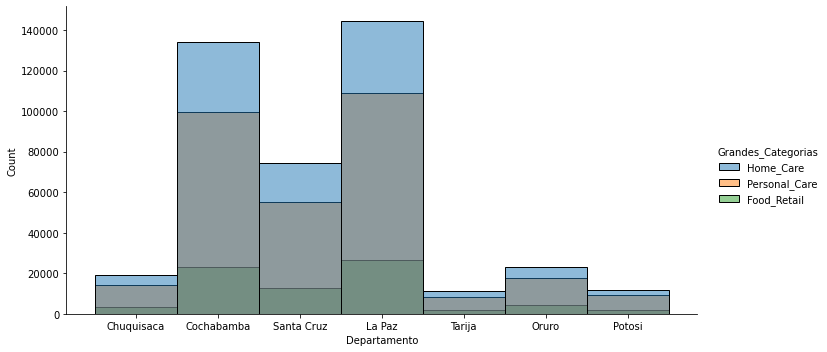

In [15]:
sns.displot(df2, x='Departamento', bins=1, aspect=2, hue='Grandes_Categorias')

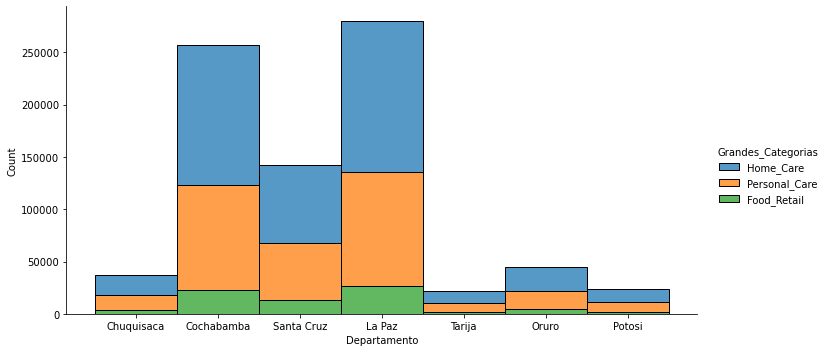

In [16]:
sns.displot(df2, x='Departamento', bins=1, aspect=2, hue='Grandes_Categorias', multiple='stack')

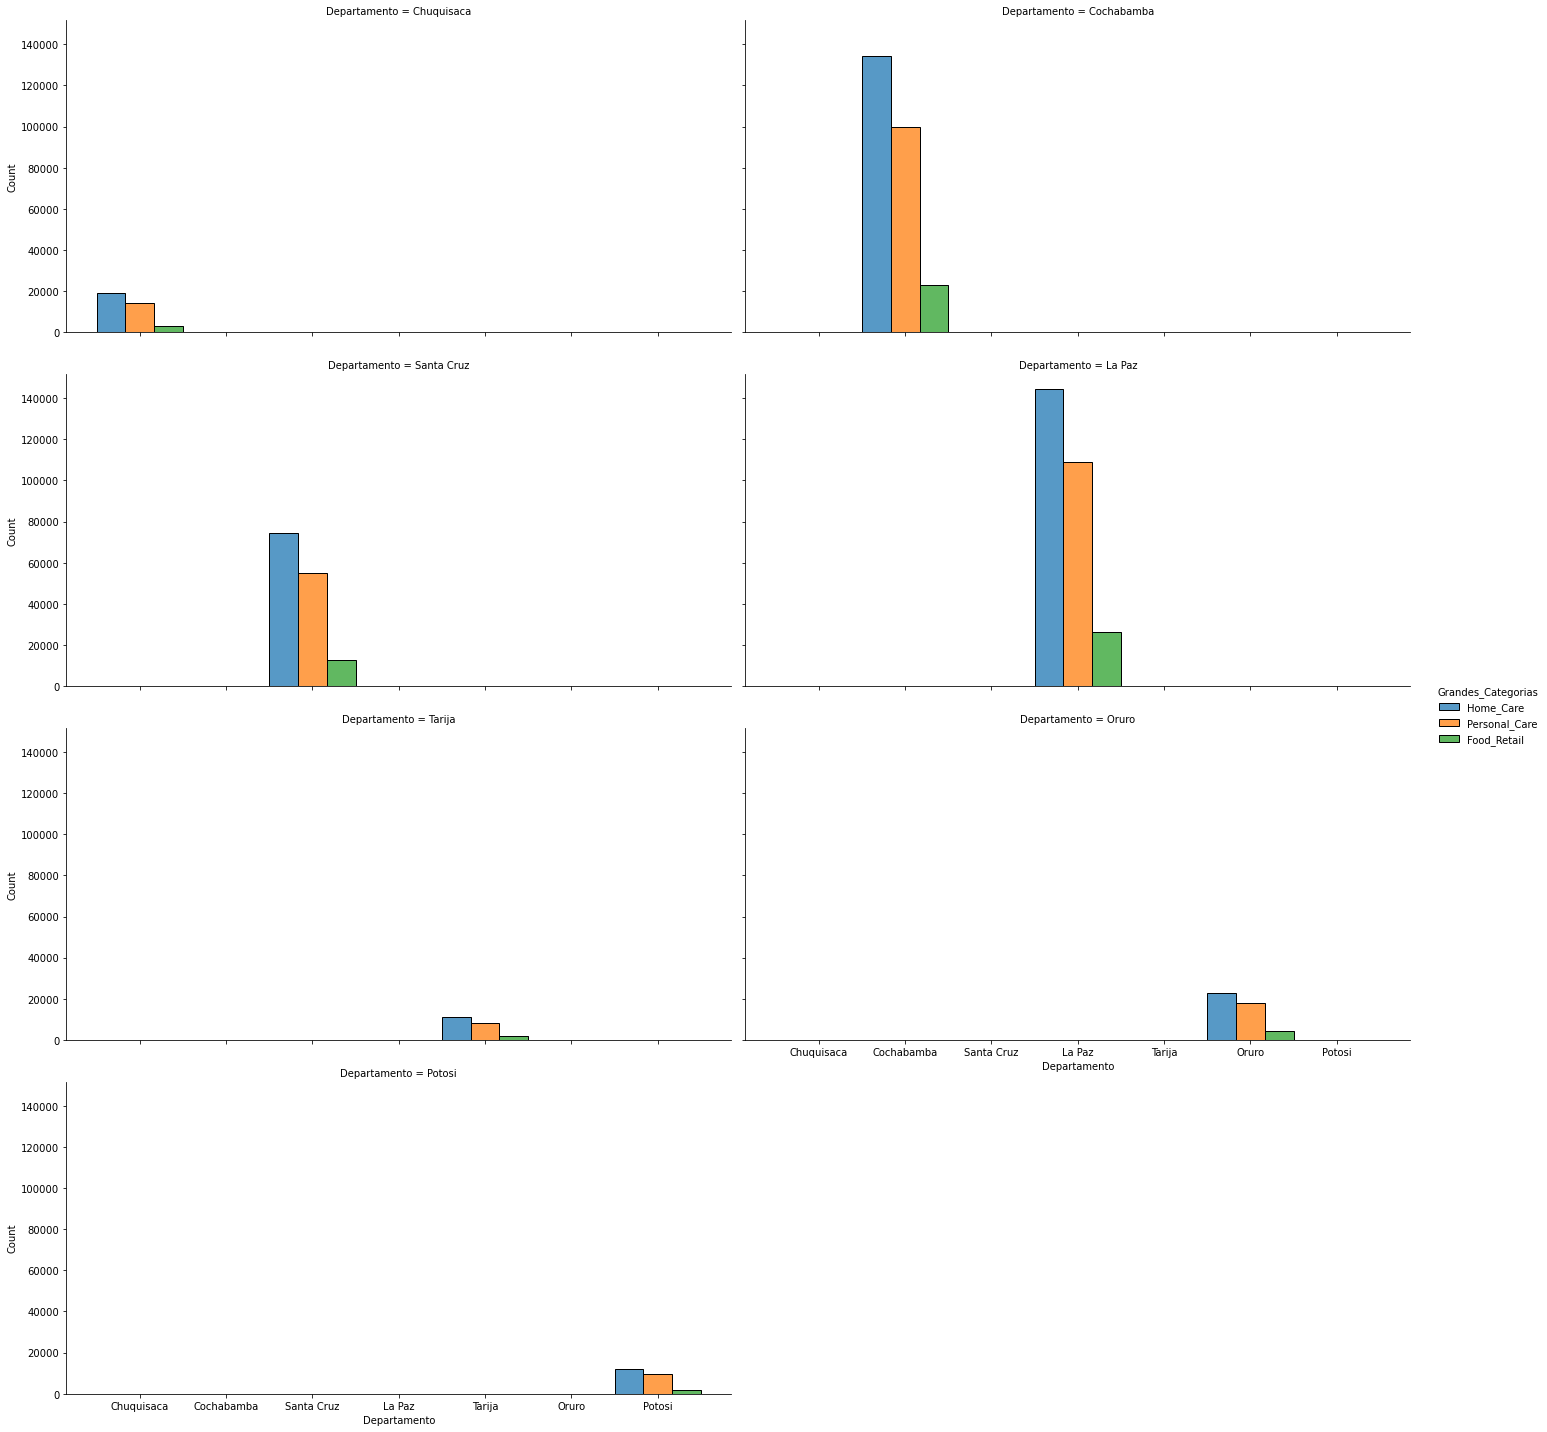

In [17]:
sns.displot(df2, x='Departamento', bins=1, aspect=2, hue='Grandes_Categorias', multiple='dodge', col='Departamento', col_wrap=2)

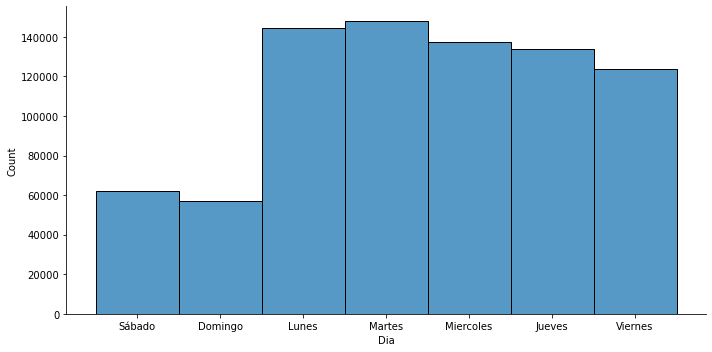

In [18]:
sns.displot(df2, x="Dia", aspect=2)

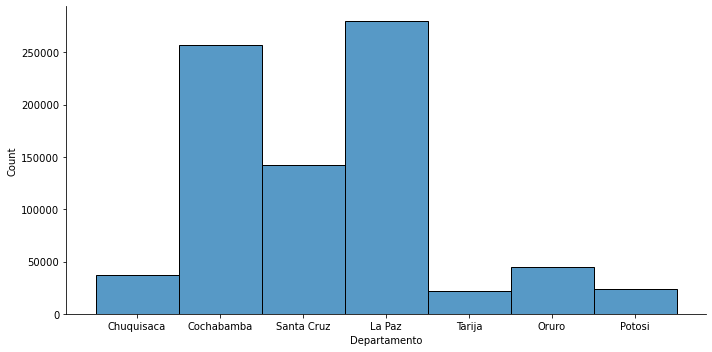

In [19]:
sns.displot(df2, x="Departamento", aspect=2)

In [20]:
df2['Producto'].value_counts(normalize=True)

desinfectante ola clorito 1l                                  0.021309
prod1 clorito desinf blanqueador 12x1l                        0.014525
ola clorito desinf blanqueador 12x1l                          0.014525
lavavajilla ola limon 2l                                      0.013209
alcohol en gel sanitizador liz neutro 360ml                   0.010933
                                                                ...   
rexona sanitizador original 6x1l - 6 und x caja               0.000001
ola aromatic aer bouquet de rosas 12x300ml - 12 und x caja    0.000001
cif limp liq antig profesional bot 4x5l - 4 und x caja        0.000001
sedal sh ceramidas 96x45ml                                    0.000001
skip pvo esencia de comfort 3x3.8kg - unidad                  0.000001
Name: Producto, Length: 1292, dtype: float64

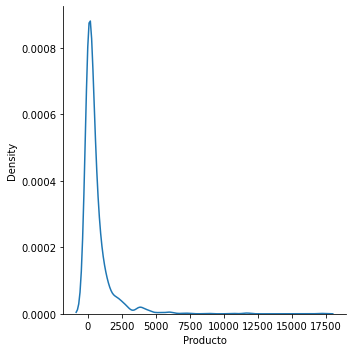

In [21]:
sns.displot(df2['Producto'].value_counts(), kind="kde")

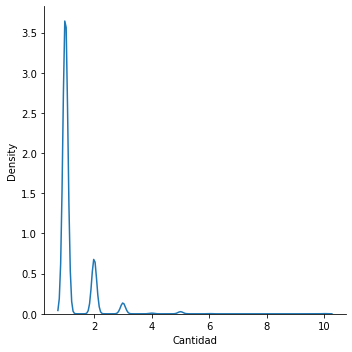

In [22]:
prod_filt=(df2['Producto']=='desinfectante ola clorito 1l') & (df2['Cantidad']<11)
sns.displot(data=df2[prod_filt], x='Cantidad', kind="kde")

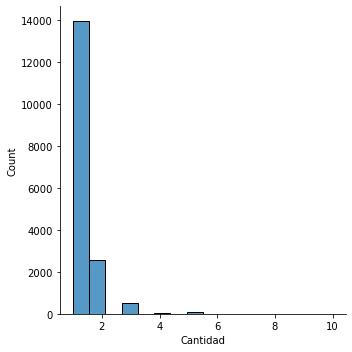

In [23]:
prod_filt=(df2['Producto']=='desinfectante ola clorito 1l') & (df2['Cantidad']<11)
sns.displot(data=df2[prod_filt], x='Cantidad')

In [25]:
#sns.displot(data=df2, x='Departamento', y=, aspect=2)

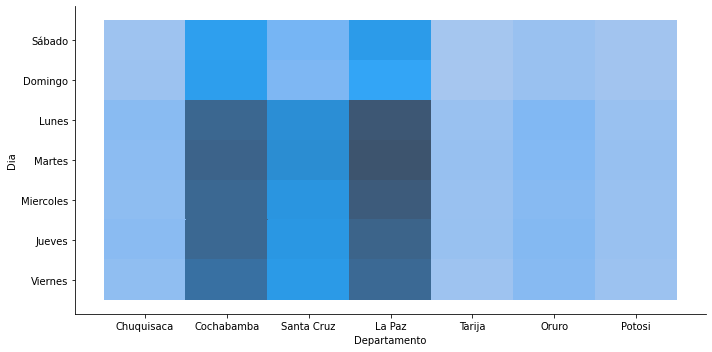

In [26]:
sns.displot(data=df2, x='Departamento', y='Dia', aspect=2)

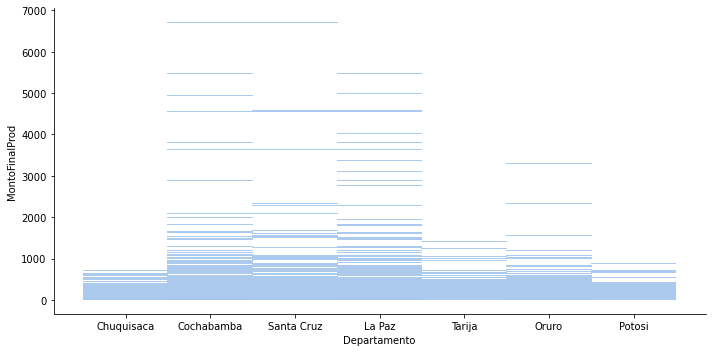

In [27]:
sns.displot(data=df2, x='Departamento', y='MontoFinalProd',aspect=2)

<AxesSubplot:xlabel='MontoFinalProd', ylabel='Cantidad'>

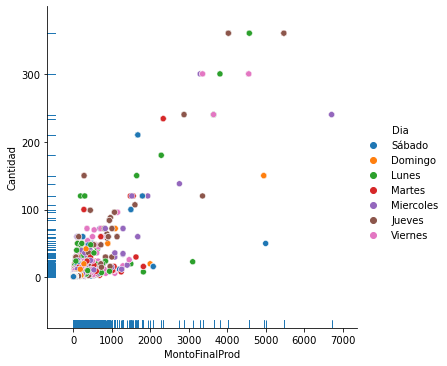

In [28]:
sns.relplot(data=df2, x='MontoFinalProd', y='Cantidad', hue='Dia')
sns.rugplot(data=df2, x='MontoFinalProd', y='Cantidad')

In [29]:
#sns.pairplot(df2)

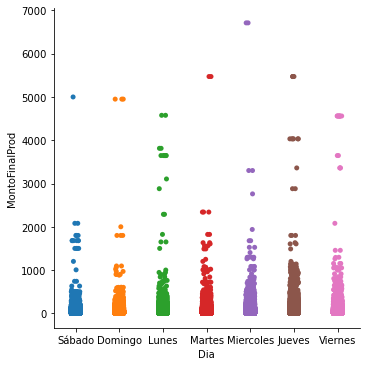

In [30]:
sns.catplot(data= df2, x='Dia', y='MontoFinalProd')

In [31]:
#sns.catplot(data= df2, x='Dia', y='MontoFinalProd', kind='swarm')

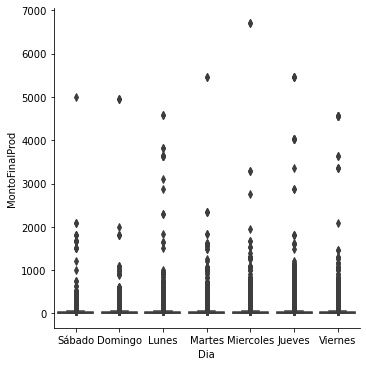

In [32]:
sns.catplot(data= df2, x='Dia', y='MontoFinalProd', kind='box')

In [ ]:
#df2.boxplot(['Precio'])

In [ ]:
#filt_precio=df2['Precio']>200
#df2[filt_precio]

In [33]:
#filt_producto= df2['Producto']=='liz sanitizador neutro 2x5l - 2 und x caja'
#df2[filt_producto]['Precio'].describe()

KeyError: 'Precio'

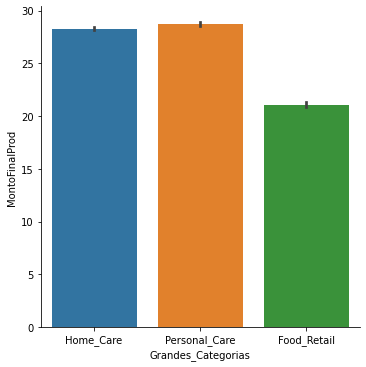

In [34]:
sns.catplot(x='Grandes_Categorias', y='MontoFinalProd', data=df2, kind='bar')

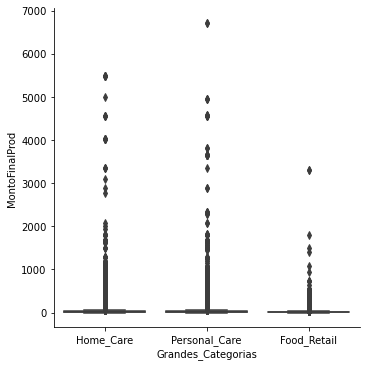

In [35]:
sns.catplot(data=df2, x='Grandes_Categorias', y='MontoFinalProd', kind='box')

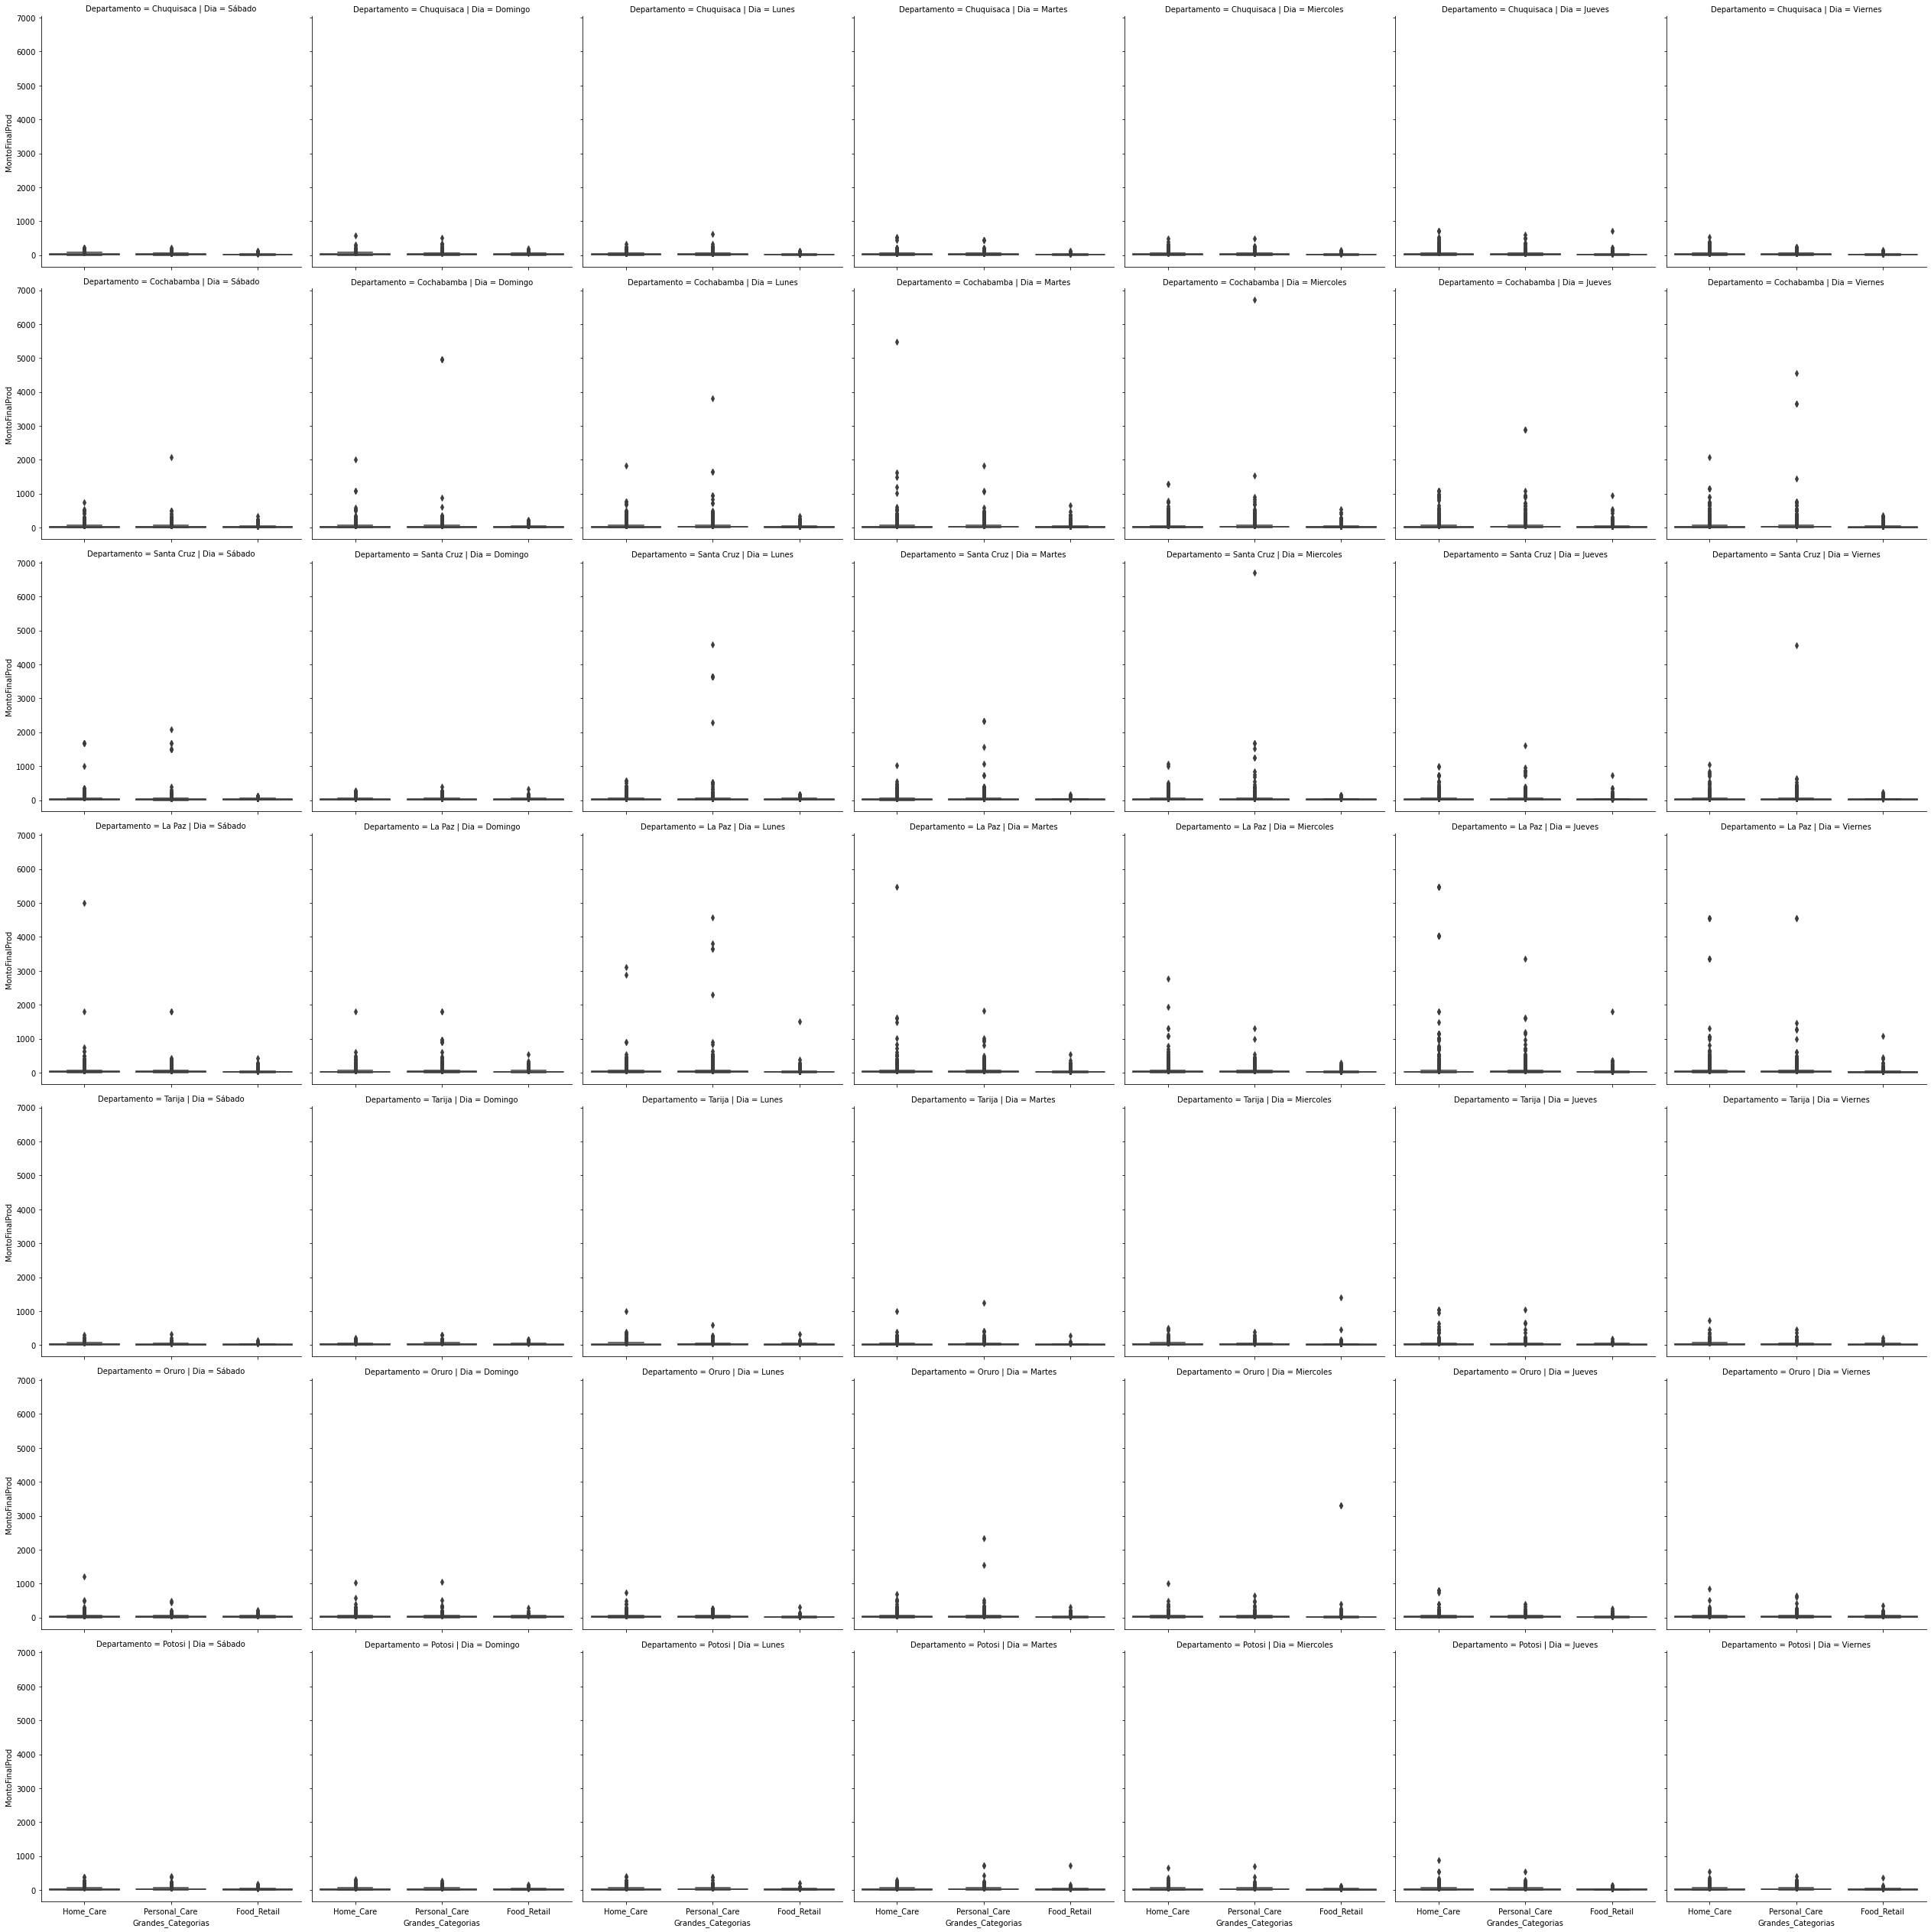

In [36]:
sns.catplot(data=df2, x='Grandes_Categorias', y='MontoFinalProd',row='Departamento', col='Dia', kind='box')

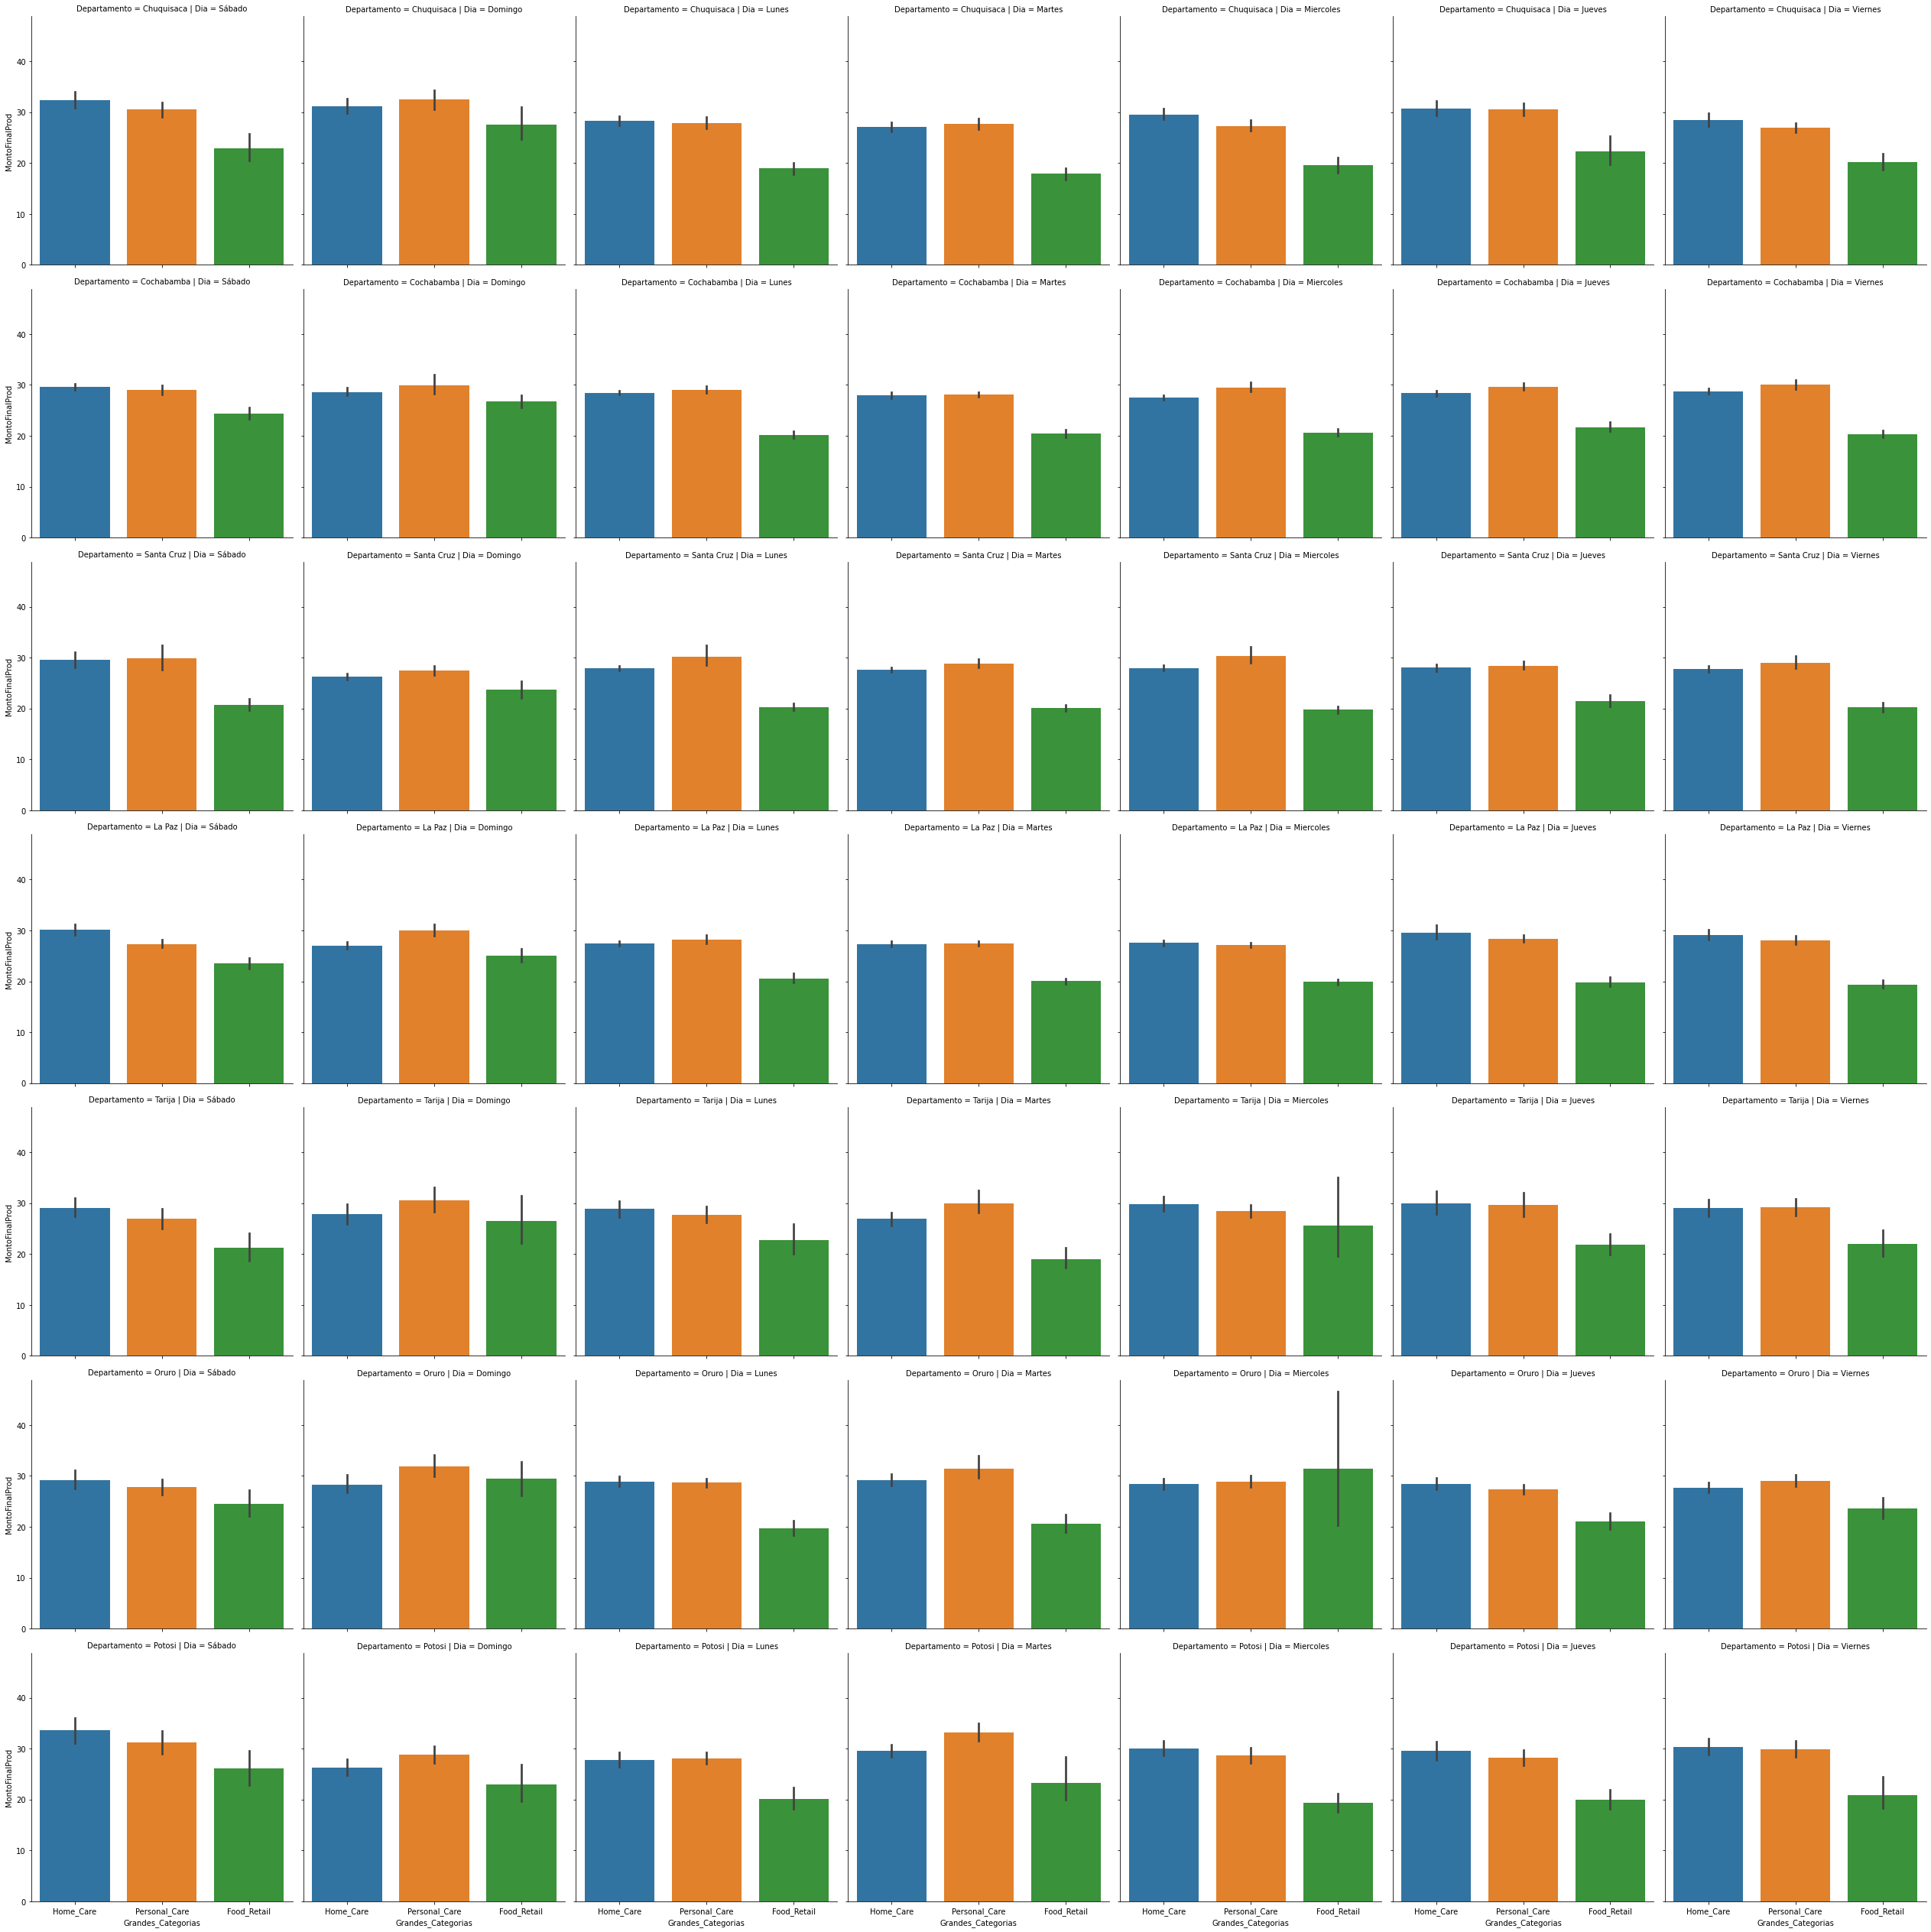

In [37]:
sns.catplot(x='Grandes_Categorias', y='MontoFinalProd',row='Departamento', col='Dia' ,data=df2, kind='bar')

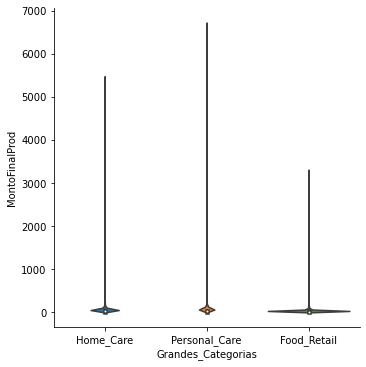

In [38]:
sns.catplot(data=df2, x='Grandes_Categorias', y='MontoFinalProd', kind='violin')

In [39]:
df2.columns

Index(['PedidoId', 'Cantidad', 'MontoProd', 'MontoFinalProd', 'Producto',
       'Fecha', 'Id_Cliente', 'Departamento', 'CodigoProducto',
       'Grandes_Categorias', 'Dia'],
      dtype='object')

In [40]:
df3= pd.get_dummies(df2, columns=['Producto','Departamento','Grandes_Categorias', 'Dia'], drop_first=True)
df3.head()

,PedidoId,Cantidad,MontoProd,MontoFinalProd,Fecha,Id_Cliente,CodigoProducto,Producto_ prod25 limp liq antig profesional bot 4x5l,Producto_acondicionador dove 400ml,Producto_acondicionador dove control caida 400ml,...,Departamento_Santa Cruz,Departamento_Tarija,Grandes_Categorias_Home_Care,Grandes_Categorias_Personal_Care,Dia_Jueves,Dia_Lunes,Dia_Martes,Dia_Miercoles,Dia_Sábado,Dia_Viernes
0,38,1,14.5,15.0,2020-03-28,59170350140,572054,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,38,1,26.0,26.0,2020-03-28,59170350140,6010102,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,38,1,28.0,28.0,2020-03-28,59170350140,6030172,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,38,1,18.0,18.0,2020-03-28,59170350140,67332811,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,38,1,8.0,8.0,2020-03-28,59170350140,67272819,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [42]:
col_list= df3.columns.to_list()

In [47]:
df=df3.drop(['PedidoId','MontoProd','Fecha','Id_Cliente','CodigoProducto'], axis=1)

In [50]:
col_features= df.columns.to_list()

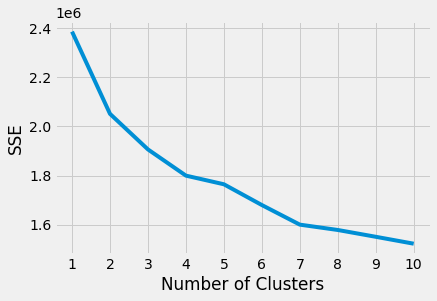

In [51]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[col_features])


kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [52]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[col_features])

kmeans = KMeans(init="random", n_clusters=7, n_init=10, max_iter=300, random_state=42)

kmeans.fit(scaled_features)

df['Cluster'] = kmeans.labels_


print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)

1600584.8151643204
[[ 1.66426856e-03  4.06915193e-03  1.49120191e-05 ...  1.71637340e-01
   7.89964211e-02  1.52892932e-01]
 [ 1.38325727e-03  4.05391229e-03  6.92515980e-05 ...  1.77498771e-01
   7.78803471e-02  1.54119431e-01]
 [ 1.63473157e-03  4.02300600e-03  3.88731956e-05 ...  1.61258973e-01
   8.44973696e-02  1.48184622e-01]
 ...
 [ 1.45300237e-03  4.00202701e-03  2.68003109e-05 ...  1.66939136e-01
   6.96540080e-02  1.54436791e-01]
 [ 1.52367842e-03  3.99312693e-03 -7.52165257e-19 ...  1.67254953e-01
   7.60109307e-02  1.58284264e-01]
 [ 1.33861419e-03  3.90004922e-03  4.26904605e-19 ...  1.70883925e-01
   7.75720242e-02  1.53024182e-01]]
6


In [53]:
df.head()

,Cantidad,MontoFinalProd,Producto_ prod25 limp liq antig profesional bot 4x5l,Producto_acondicionador dove 400ml,Producto_acondicionador dove control caida 400ml,Producto_acondicionador dove recontruccion completa 400ml,Producto_acondicionador dove regeneración extrema 400ml,Producto_acondicionador dove regeneración extrema 750ml,Producto_acondicionador prod11 bomba argan 650ml,Producto_acondicionador prod11 ceramidas 340ml,...,Departamento_Tarija,Grandes_Categorias_Home_Care,Grandes_Categorias_Personal_Care,Dia_Jueves,Dia_Lunes,Dia_Martes,Dia_Miercoles,Dia_Sábado,Dia_Viernes,Cluster
0,1,15.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,2
1,1,26.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,2
2,1,28.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,6
3,1,18.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,6
4,1,8.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,2


In [57]:
df2['Cluster']=df['Cluster']

<ipython-input-57-071d41f8da46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster']=df['Cluster']


In [58]:
df2.head()

,PedidoId,Cantidad,MontoProd,MontoFinalProd,Producto,Fecha,Id_Cliente,Departamento,CodigoProducto,Grandes_Categorias,Dia,Cluster
0,38,1,14.5,15.0,jaboncillo lifebuoy antibacterial crema 3undx ...,2020-03-28,59170350140,Chuquisaca,572054,Home_Care,Sábado,2
1,38,1,26.0,26.0,lavavajilla ola limon 2l,2020-03-28,59170350140,Chuquisaca,6010102,Home_Care,Sábado,2
2,38,1,28.0,28.0,"suavizante ola bebe 1,7l",2020-03-28,59170350140,Chuquisaca,6030172,Personal_Care,Sábado,6
3,38,1,18.0,18.0,arroz de la huerta knorr 197g,2020-03-28,59170350140,Chuquisaca,67332811,Personal_Care,Sábado,6
4,38,1,8.0,8.0,caldos knorr de verdura estuche 12 cubos,2020-03-28,59170350140,Chuquisaca,67272819,Home_Care,Sábado,2


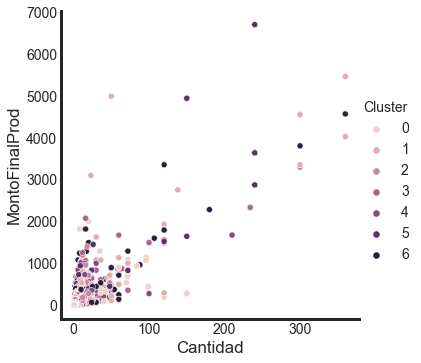

In [61]:
sns.set_style("white")
sns.relplot(x='Cantidad', y='MontoFinalProd',hue='Cluster', data=df2)

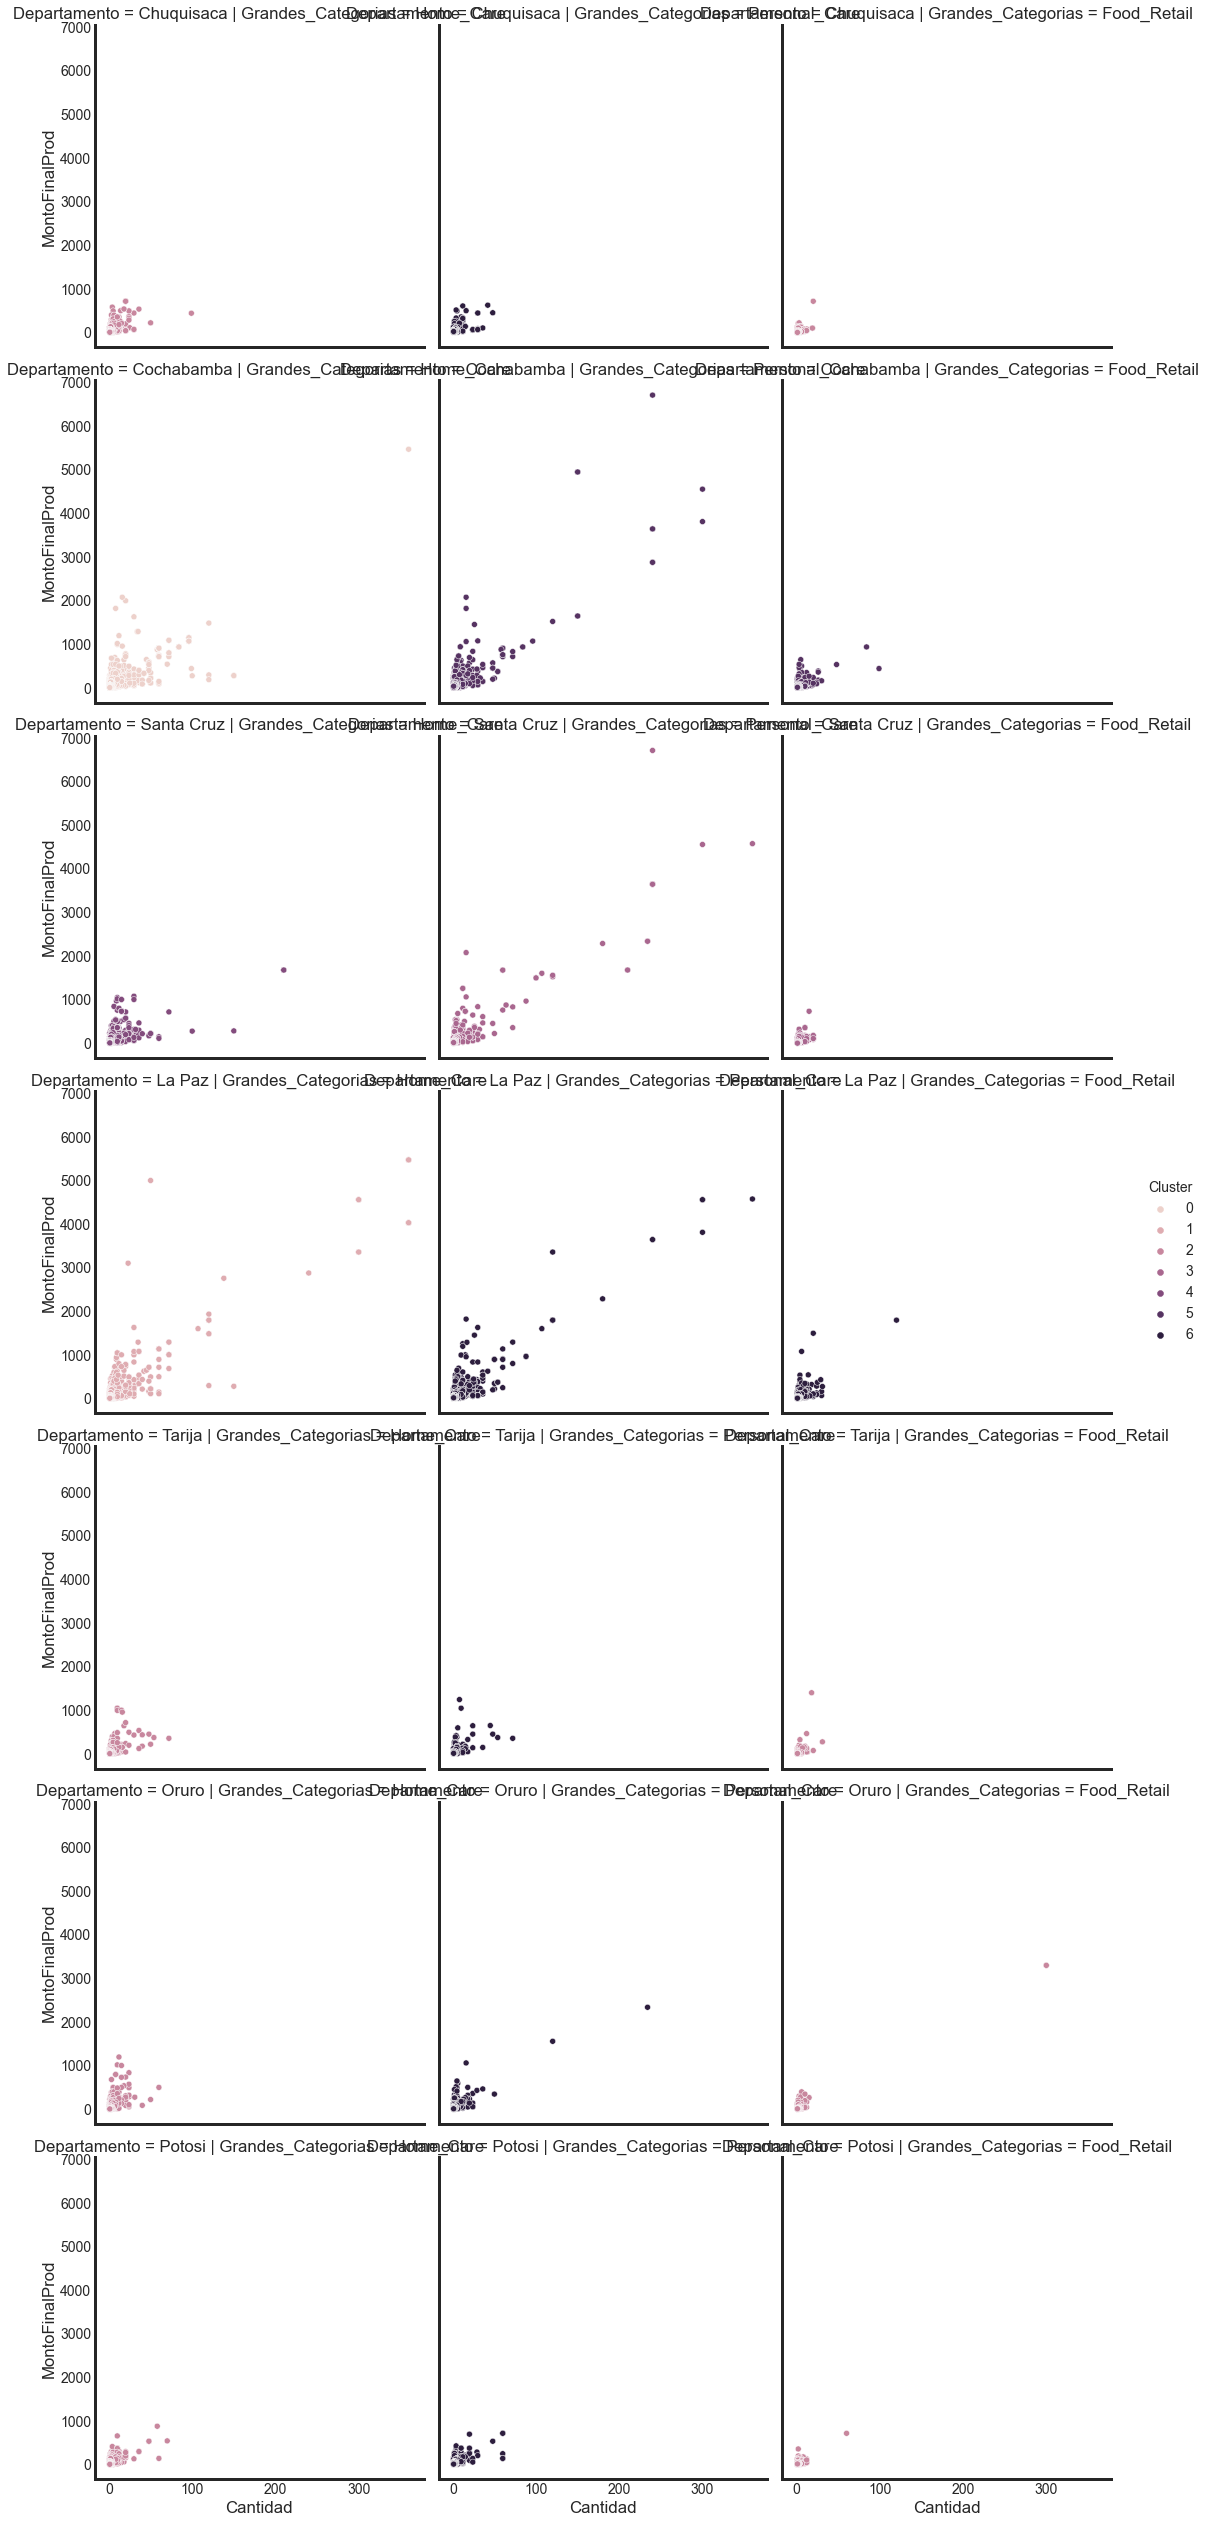

In [62]:
sns.set_style("white")
sns.relplot(x='Cantidad', y='MontoFinalProd',hue='Cluster', row='Departamento', col='Grandes_Categorias',data=df2)

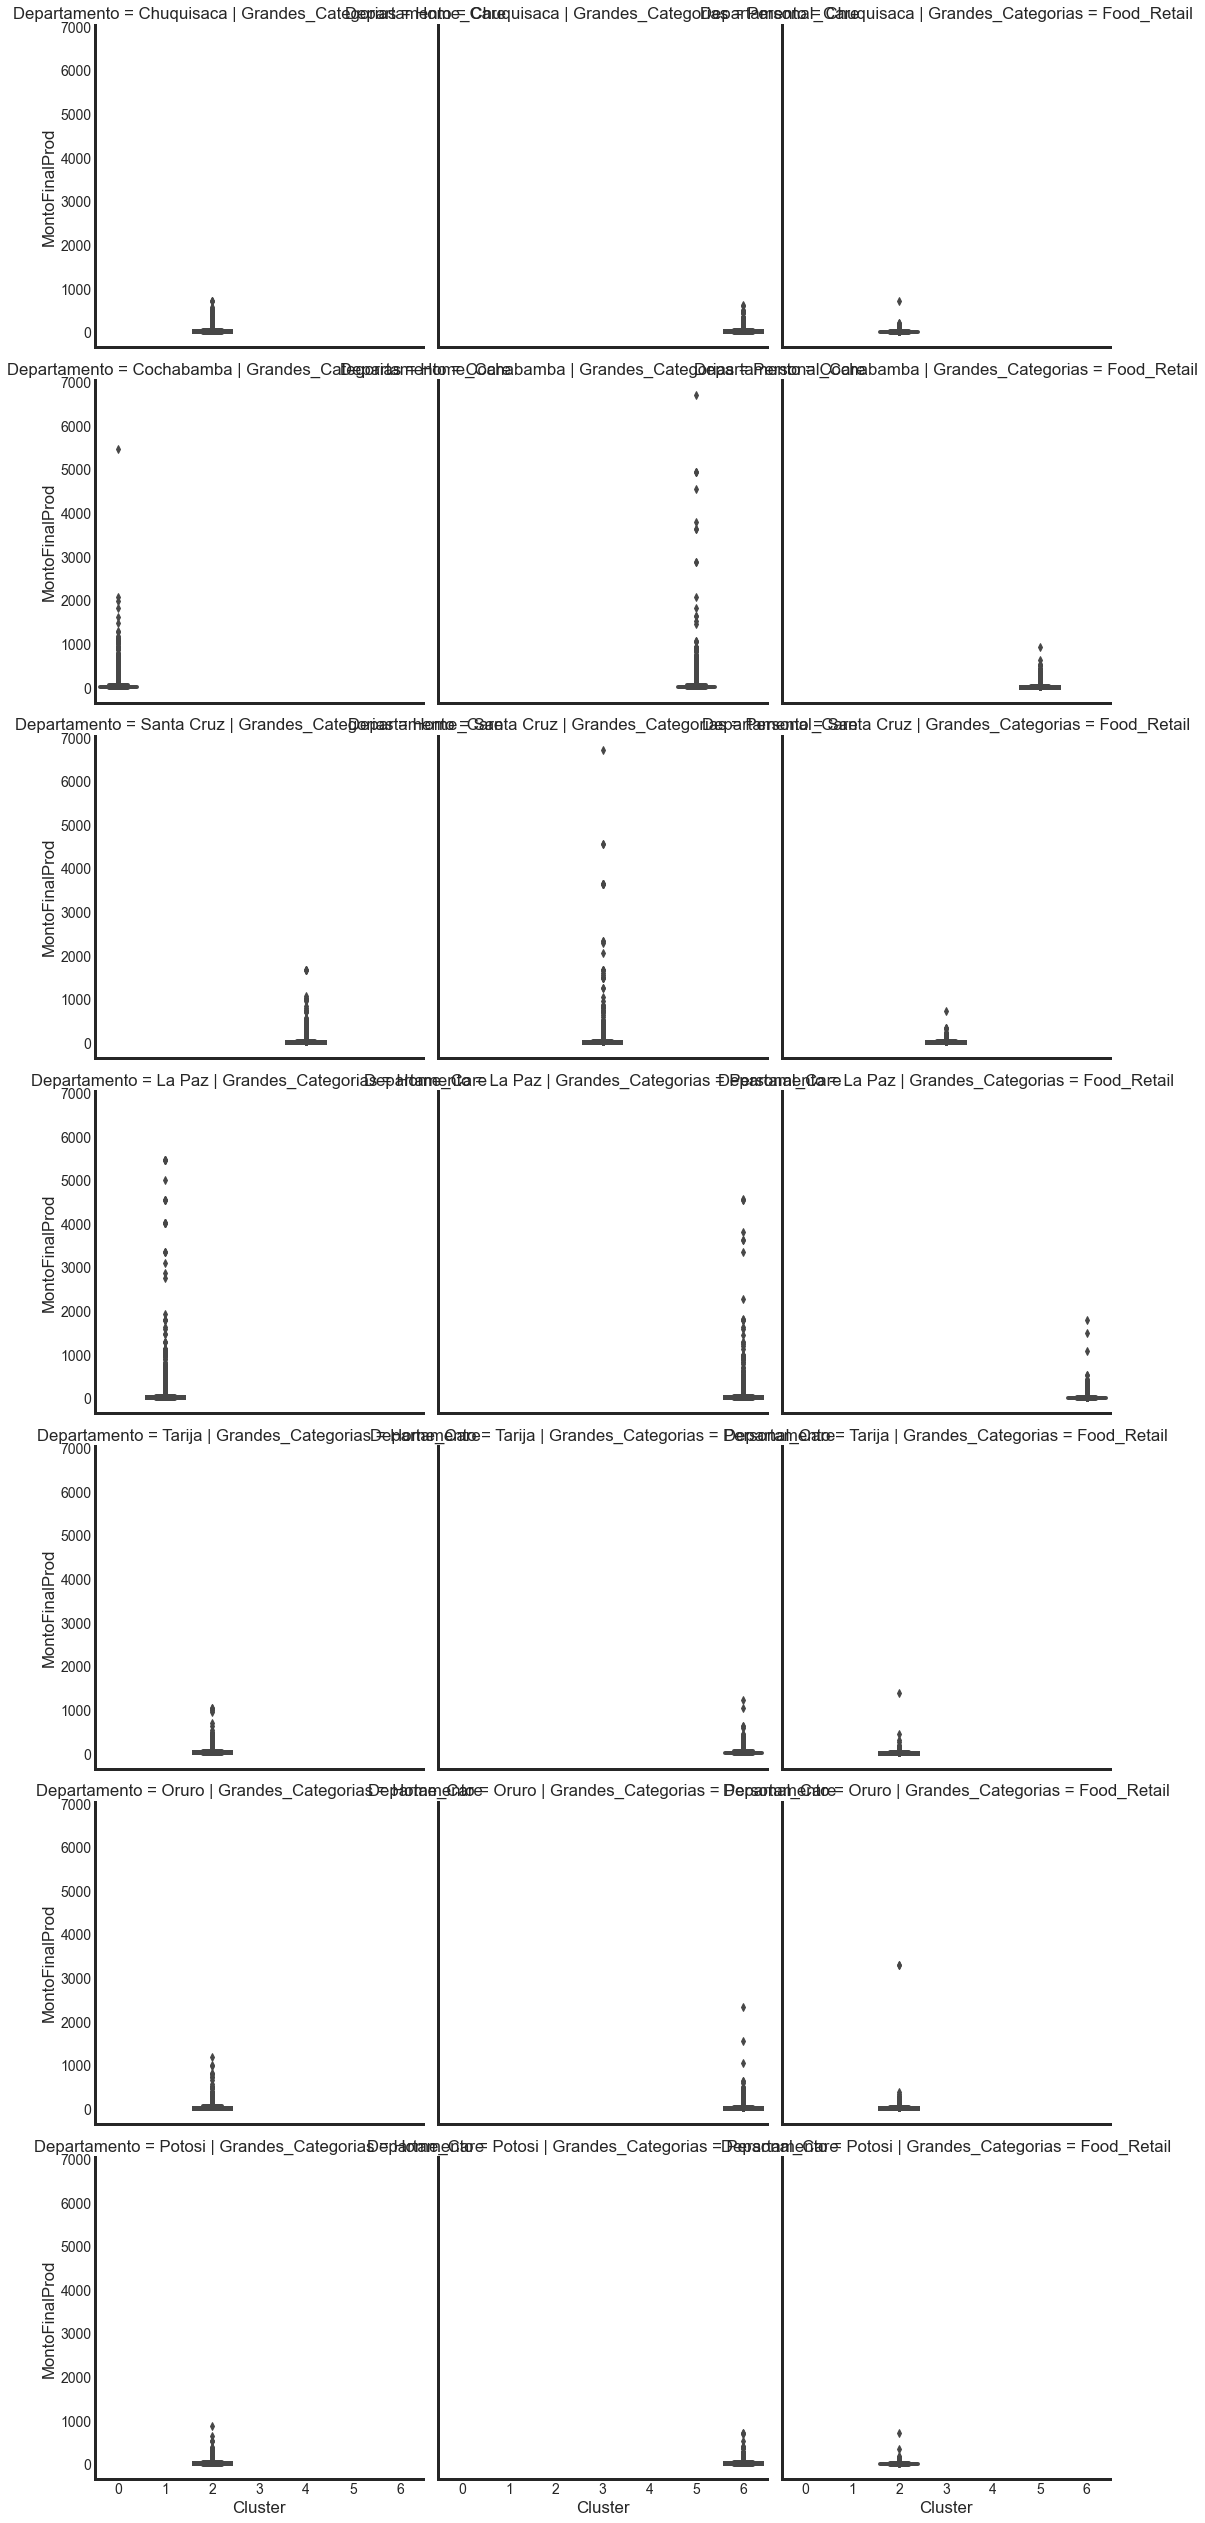

In [63]:
sns.set_style("white")
sns.catplot(x='Cluster', y='MontoFinalProd', row='Departamento', col='Grandes_Categorias',kind='box',data=df2)